# Importing the packages

In [3]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output


# Having a look at the data

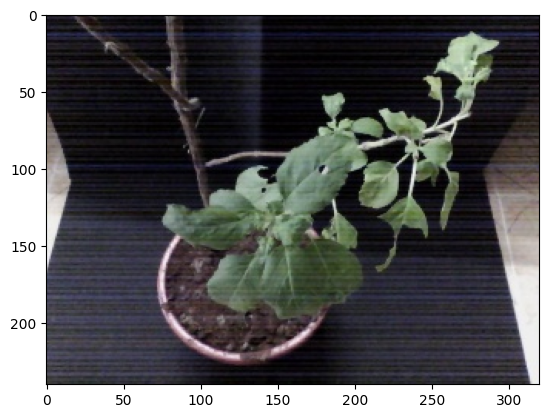

In [4]:
image=Image.open('./data/normal_images/Normal 6730.jpg')

image=np.array(image)
plt.imshow(image)

# Trying to mask the image


In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mask_canopy(image_path):
    img = cv2.imread(image_path)
    image = cv2.resize(img, (320,240))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_green = np.array([36, 25, 25])
    upper_green = np.array([86, 255, 255])


    mask = cv2.inRange(hsv, lower_green, upper_green)


    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)


    result = cv2.bitwise_and(image, image, mask=mask)

    return image, mask, result


image_path = './data/normal_images/Normal 6730.jpg'
original, mask, segmented = mask_canopy(image_path)
def print_images(original, mask, segmented):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask , cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented)
    plt.title('Segmented Image')
    plt.axis('off')

    plt.show()


## Checking Size and Resizing

In [63]:
# Adding the paths
normal_path ='./data/normal_images'
ir_path='./data/ir_images'

In [64]:
# Making the data
X=[]
y=[]
count=0
for i in os.listdir(normal_path):
    file = os.path.join(normal_path,i)
    image = cv2.imread(file)
    X.append(image.shape)

for i in os.listdir(ir_path):
    file = os.path.join(ir_path,i)
    image = cv2.imread(file)
    
    y.append(image.shape)

df = pd.DataFrame({"X":X,"y":y})
df["X"].value_counts(),df["y"].value_counts()

(X
 (240, 320, 3)    265
 Name: count, dtype: int64,
 y
 (240, 320, 3)    265
 Name: count, dtype: int64)

In [8]:
# import cv2

# def resize_image(image_path, output_path, new_size=(320, 240)):
#   """Resizes an image to the specified dimensions and saves it.

#   Args:
#     image_path: Path to the input image.
#     output_path: Path to save the resized image.
#     new_size: Tuple of new width and height.
#   """

#   img = cv2.imread(image_path)
#   resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
#   cv2.imwrite(output_path, resized_img)

# # Example usage:
# input_image = './data/normal_images/Normal 6730.jpg'
# output_image = './data/resized_image.jpg'
# resize_image(input_image, output_image)

# already resized


In [65]:

image2 = cv2.imread('./data/ir_images/IR 6730.jpg')
original ,mask , segment = mask_canopy('./data/normal_images/Normal 6730.jpg')
mask.shape , image2.shape

((240, 320), (240, 320, 3))

## Printing the images

In [80]:
def print_masked_thermal_image(image2, mask):
    
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    image2_np = np.array(image2)
    masked_image = cv2.bitwise_and(image2_np, image2_np, mask=binary_mask)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image2_np)
    plt.title('Original Thermal Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(masked_image)
    plt.title('Masked Thermal Image')
    plt.axis('off')

    plt.show()
    return masked_image





In [12]:
# # Resizing the images
# for i in os.listdir(normal_path):
#     file = os.path.join(normal_path,i)
#     resize_image(file, file)

# already resized them

In [13]:
len(os.listdir(normal_path))

265

## Checking images that are not properly segmented

./data/normal_images\Normal 6730.jpg


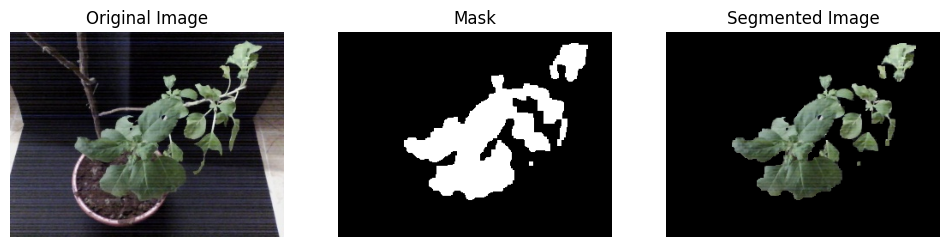



./data/normal_images\Normal 6731.jpg


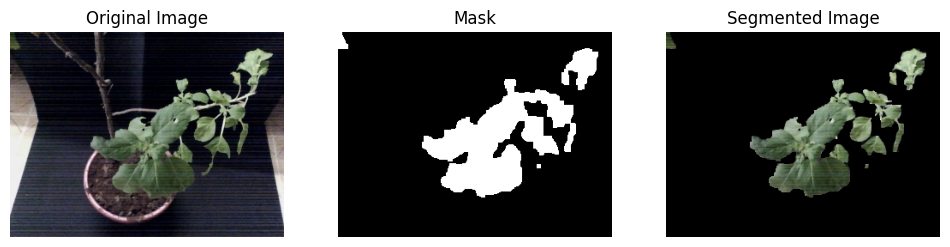



./data/normal_images\Normal 6732.jpg


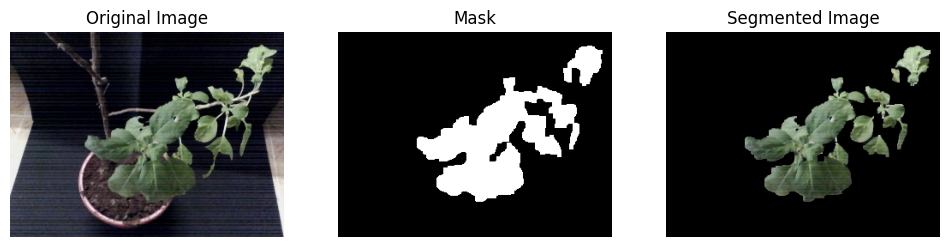



./data/normal_images\Normal 6733.jpg


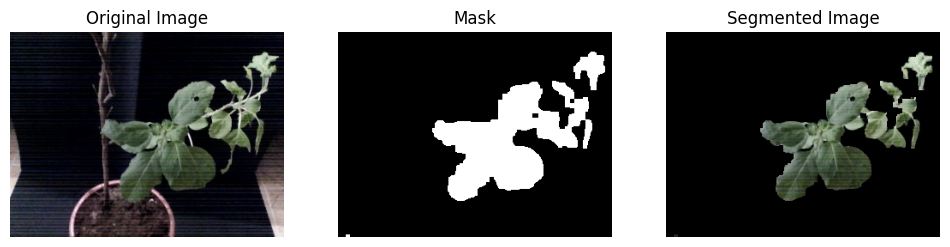



./data/normal_images\Normal 6734.jpg


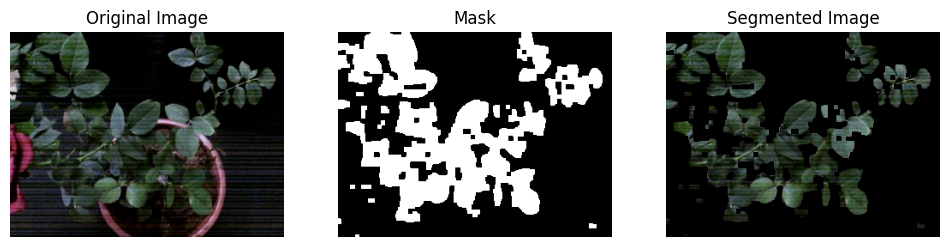



./data/normal_images\Normal 6735.jpg


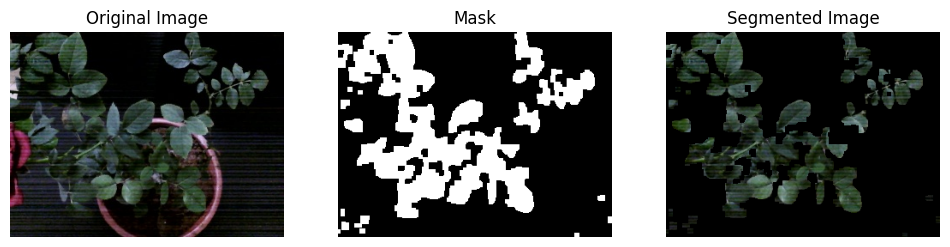



./data/normal_images\Normal 6736.jpg


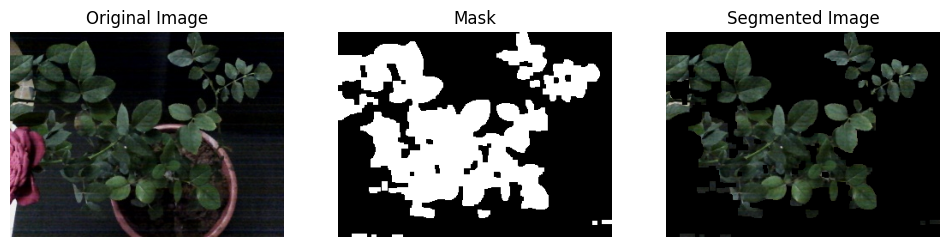



./data/normal_images\Normal 6737.jpg


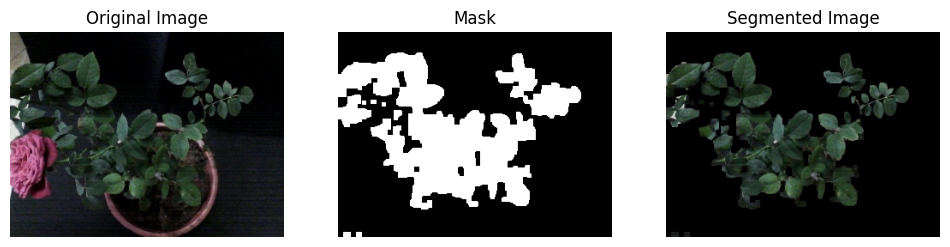



./data/normal_images\Normal 6738.jpg


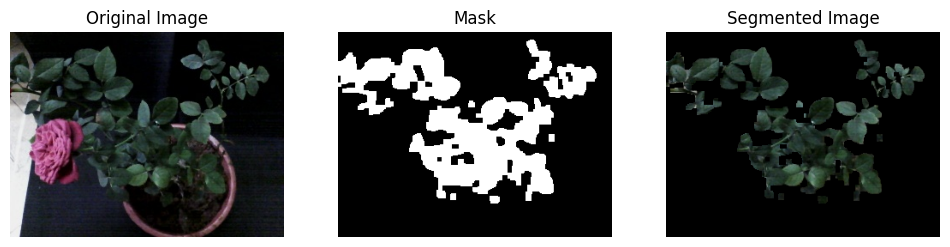



./data/normal_images\Normal 6739.jpg


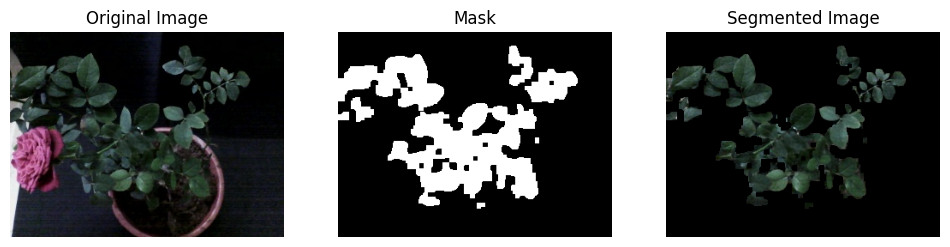



./data/normal_images\Normal 6741.jpg


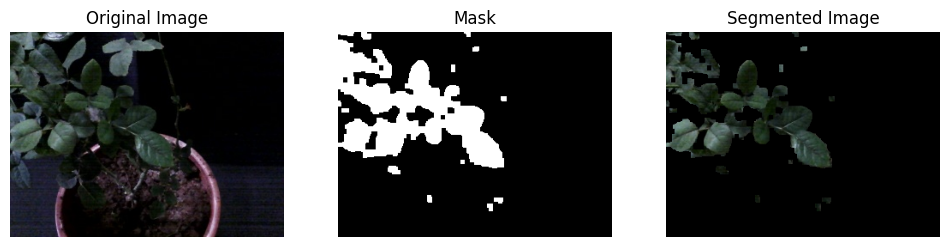



./data/normal_images\Normal 6742.jpg


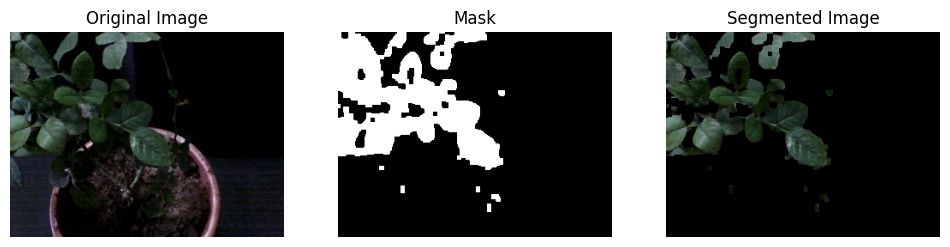



./data/normal_images\Normal 6743.jpg


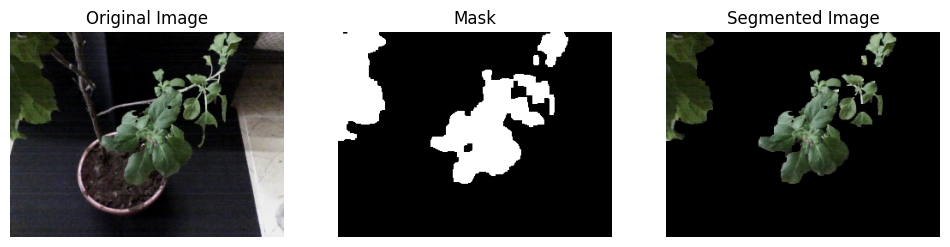



./data/normal_images\Normal 6744.jpg


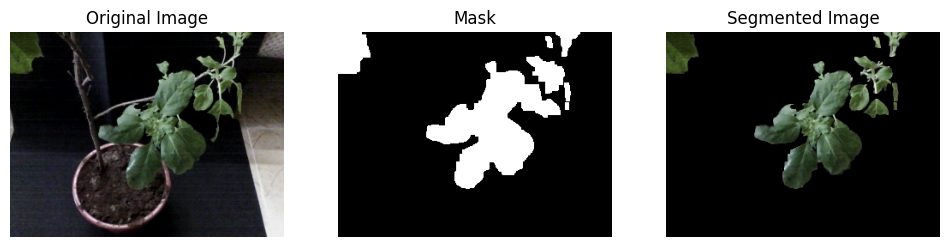



./data/normal_images\Normal 6745.jpg


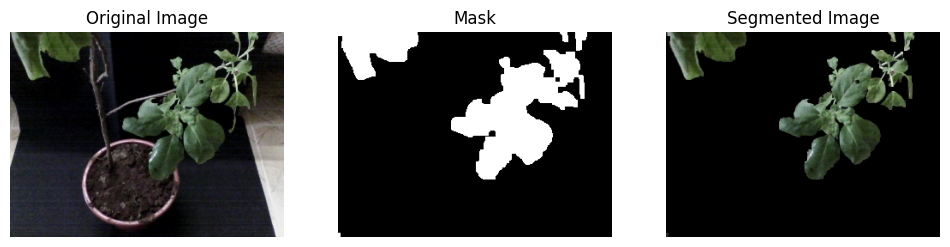



./data/normal_images\Normal 6746.jpg


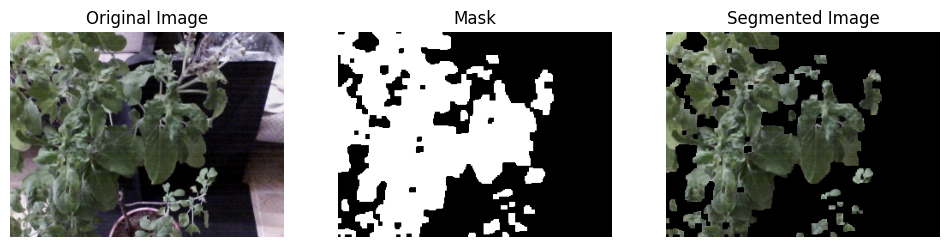



./data/normal_images\Normal 6747.jpg


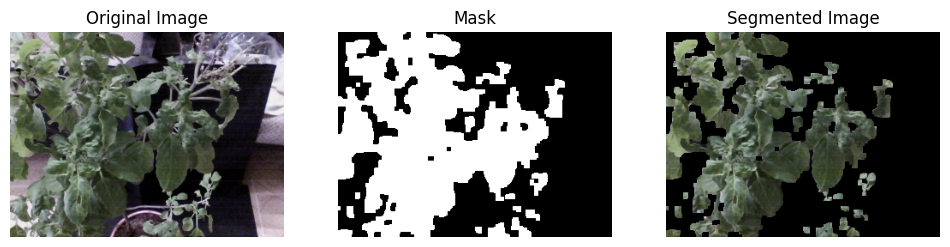



./data/normal_images\Normal 6748.jpg


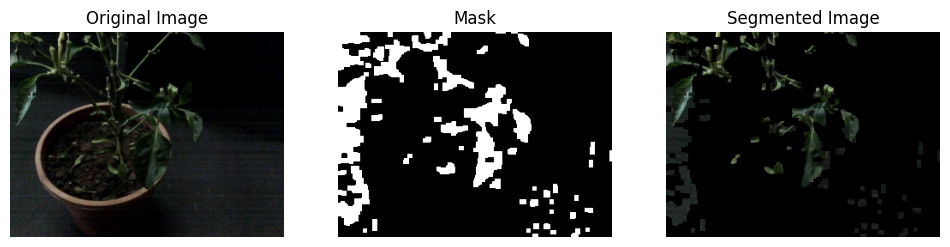



./data/normal_images\Normal 6749.jpg


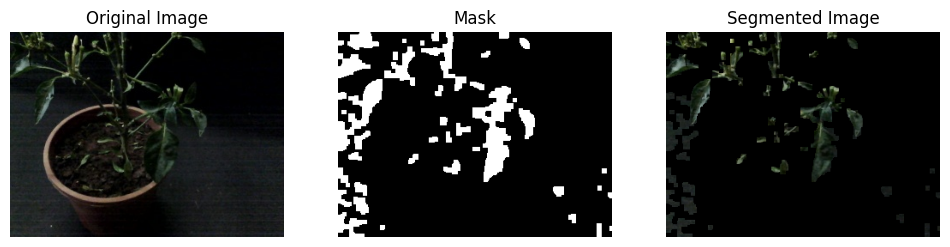



./data/normal_images\Normal 6750.jpg


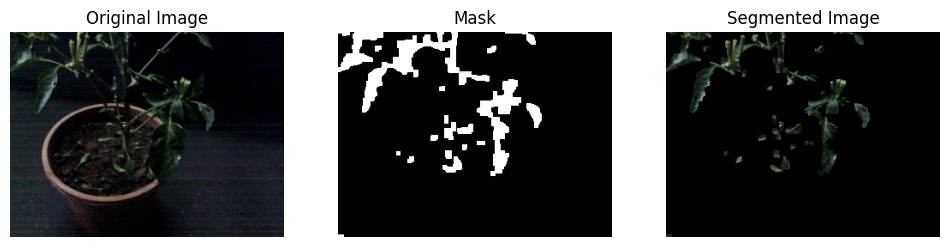



./data/normal_images\Normal 6751.jpg


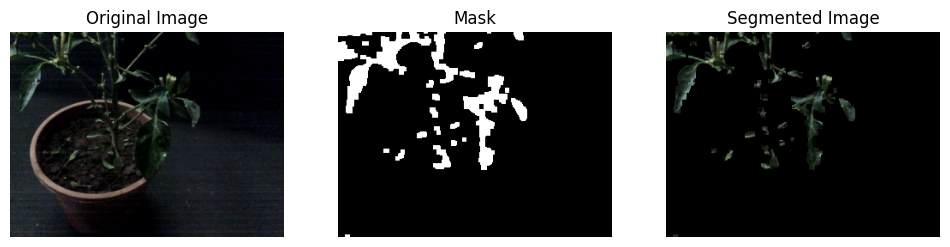



./data/normal_images\Normal 6752.jpg


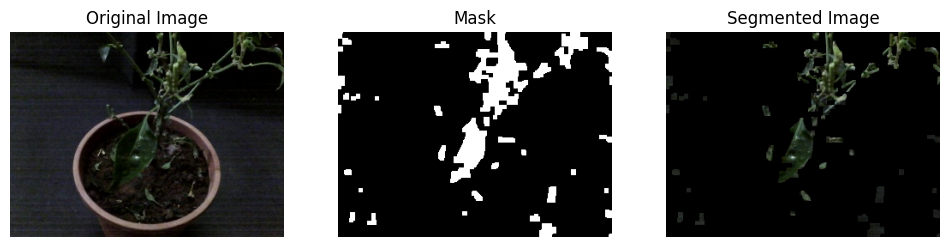



./data/normal_images\Normal 6753.jpg


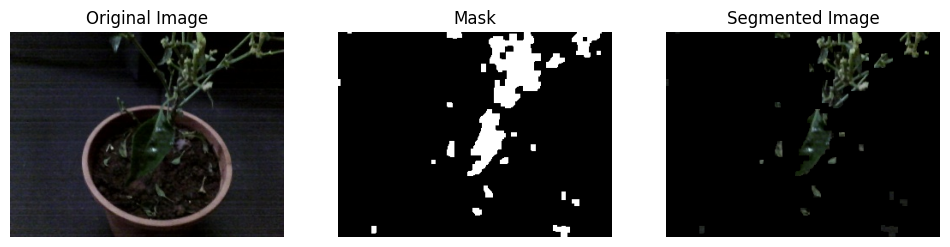



./data/normal_images\Normal 6754.jpg


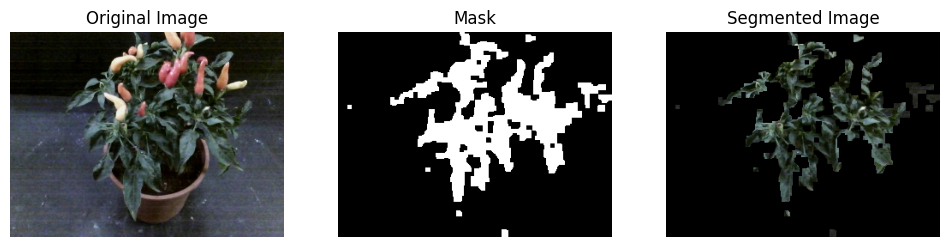



./data/normal_images\Normal 6755.jpg


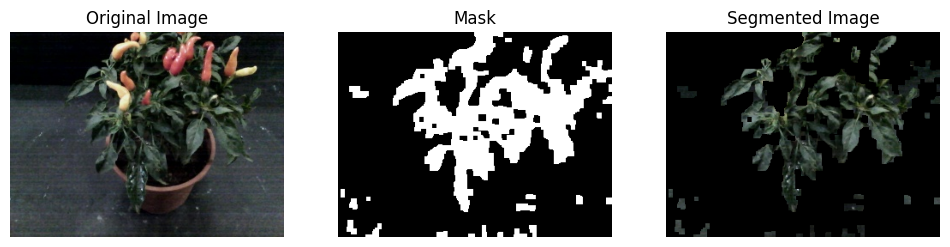



./data/normal_images\Normal 6756.jpg


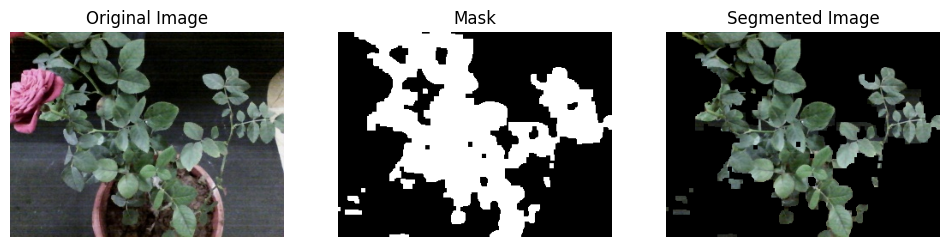



./data/normal_images\Normal 6757.jpg


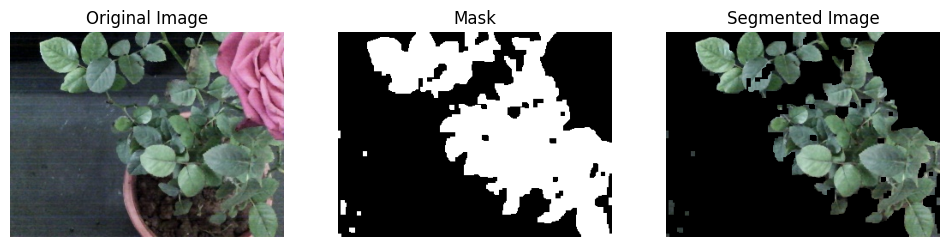



./data/normal_images\Normal 6758.jpg


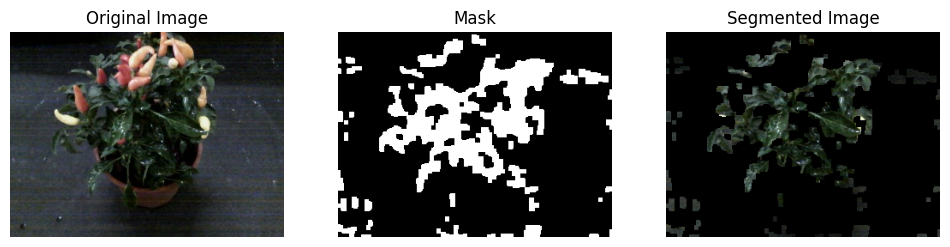



./data/normal_images\Normal 6759.jpg


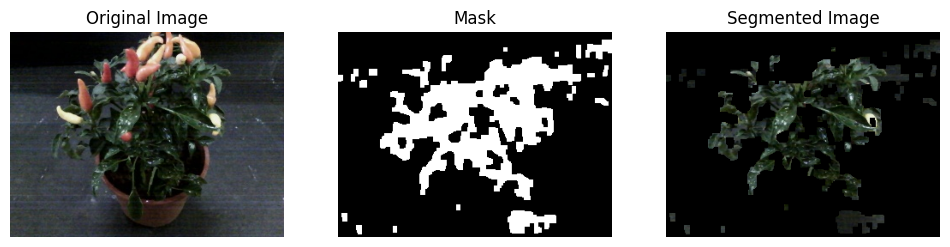



./data/normal_images\Normal 6760.jpg


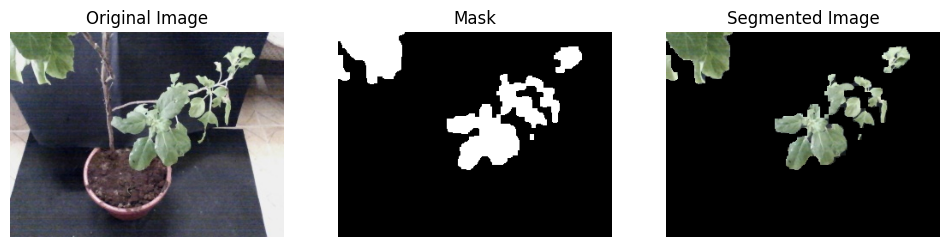



./data/normal_images\Normal 6761.jpg


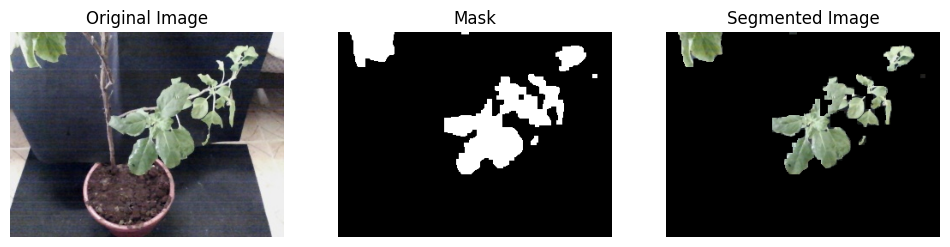



./data/normal_images\Normal 6762.jpg


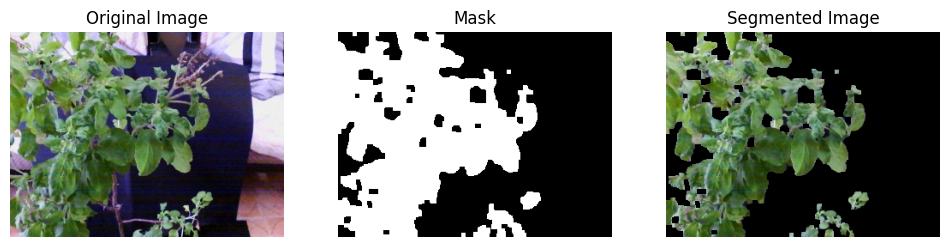



./data/normal_images\Normal 6763.jpg


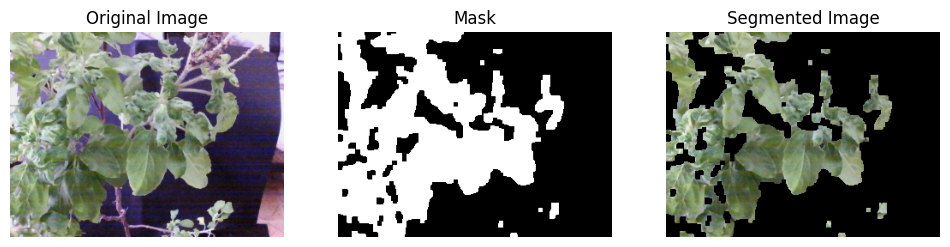



./data/normal_images\Normal 6764.jpg


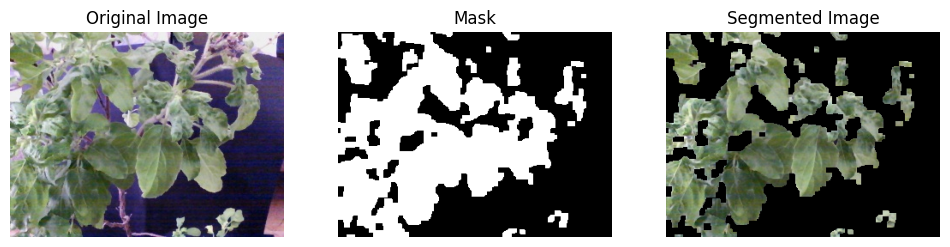



./data/normal_images\Normal 6765.jpg


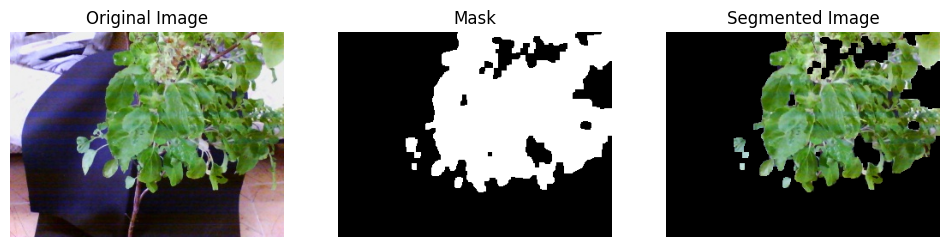



./data/normal_images\Normal 6766.jpg


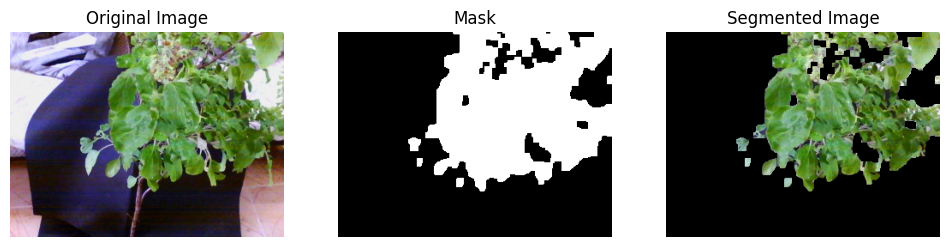



./data/normal_images\Normal 6770.jpg


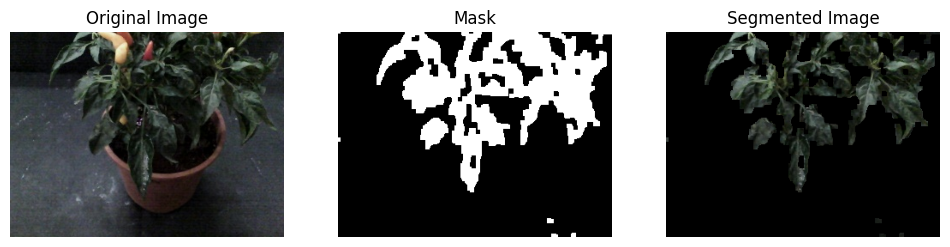



./data/normal_images\Normal 6771.jpg


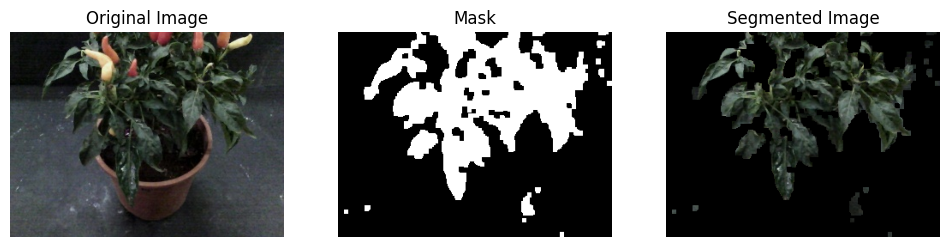



./data/normal_images\Normal 6772.jpg


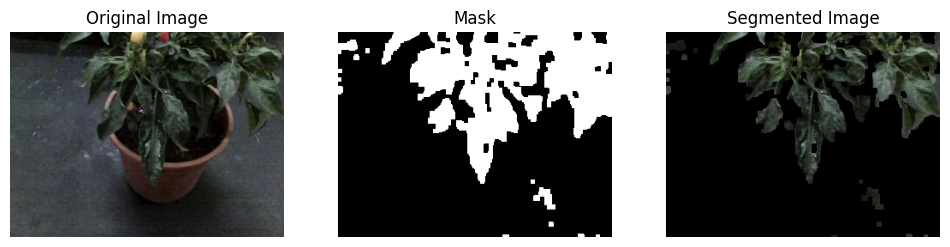



./data/normal_images\Normal 6774.jpg


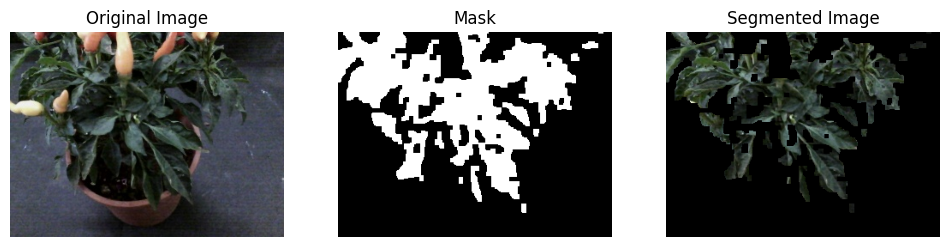



./data/normal_images\Normal 6775.jpg


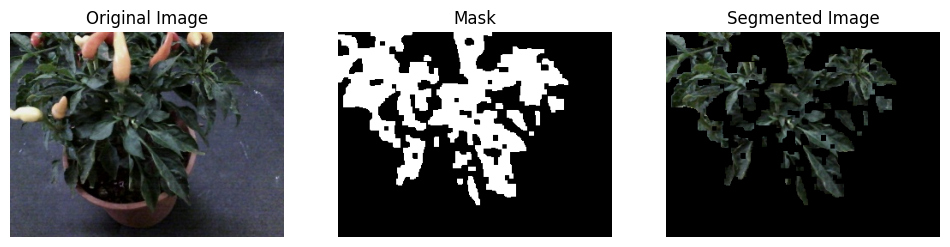



./data/normal_images\Normal 6776.jpg


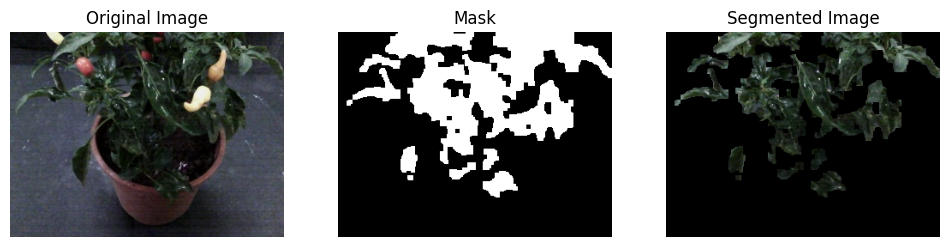



./data/normal_images\Normal 6777.jpg


KeyboardInterrupt: 

In [14]:
# Plotting the images and running them to check if they are masked properly or not . Do not run it . It take time to run and displays all the images to check if they are masked properly or not . I intervened midway the second time so it looks like an error but trsut me its not
for i in os.listdir(normal_path):
    file = os.path.join(normal_path,i)
    original ,mask , segment = mask_canopy(file)
    # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    print(file)
    print_images(original, mask, segment)
    print("\n")

## Deleting images that are not properly segmented

In [17]:

def delete_files_by_number(directory, number_array):
  """Deletes files in a directory ending with numbers from the given array.

  Args:
    directory: The path to the directory.
    number_array: An array of numbers.
  """

  for filename in os.listdir(directory):

    for number in number_array:
      if filename[:-4].endswith(str(number)):
        file_path = os.path.join(directory, filename)
        try:
          os.remove(file_path)
          print(f"Deleted: {file_path}")
        except OSError as e:
          print(f"Error deleting file {file_path}: {e}")

# Example usage:
badly_segmented = [6767,6768,6810,6811,6812,6815,6816,6821,6831,6832,6892,6979,6977,6978,6979,6988,6989,6990]
delete_files_by_number(directory=normal_path, number_array=badly_segmented)


In [18]:
delete_files_by_number(directory=ir_path, number_array=badly_segmented)

In [19]:
len(os.listdir(ir_path)),len(os.listdir(normal_path))

(265, 265)

## Created another directory for masks of the Leaves

In [41]:
# mask_path = os.makedirs('./data/mask_images', exist_ok=True)  # Create mask directory

# for i in os.listdir(normal_path):
#   file = os.path.join(normal_path, i)

#   # Check if it's a file
#   if os.path.isfile(file):
#     original, mask, segment = segment_image(file)  # Assuming segment_image returns all three
#     file_name = f"mask_{i[7:]}"  # Extract filename without extension

#     cv2.imwrite("./data/mask_images/"+file_name, mask)




In [20]:
len(os.listdir('./data/mask_images')),len(os.listdir('./data/ir_images')),len(os.listdir('./data/normal_images'))

(265, 265, 265)

In [21]:
# Example usage:
img_size = (240, 320)
image_paths = []
mask_paths = []
for i in os.listdir('./data/normal_images'):
    file = os.path.join('./data/normal_images', i)
    if os.path.isfile(file):
        image_paths.append(file)

for i in os.listdir('./data/mask_images'):
    file = os.path.join('./data/mask_images', i)
    if os.path.isfile(file):
        mask_paths.append(file)

print(len(image_paths),len(mask_paths))

265 265


## Creating a wet Mask which Highlights the region with lower temperature on the masked section of the leaves

In [69]:
def create_wet_mask(image):   
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    blue_lower = np.array([90, 50, 50])
    blue_upper = np.array([130, 255, 255])

    blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)

    return blue_mask


## Creating a dry Mask which Highlights the region with higher temperature on the masked section of the leaves

In [70]:
def create_dry_mask(image):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    red_lower1 = np.array([0, 50, 50])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 50, 50])
    red_upper2 = np.array([180, 255, 255])

    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)

    return red_mask



## Example of the work flow of Data Preprocessing

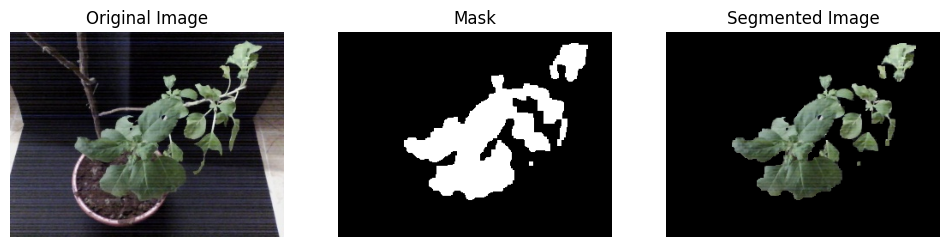

In [81]:
ir_image = cv2.imread('./data/ir_images/IR 6730.jpg')
normal_image = cv2.imread('./data/normal_images/Normal 6730.jpg')
original , mask , segment = mask_canopy('./data/normal_images/Normal 6730.jpg')
print_images(original , mask , segment)

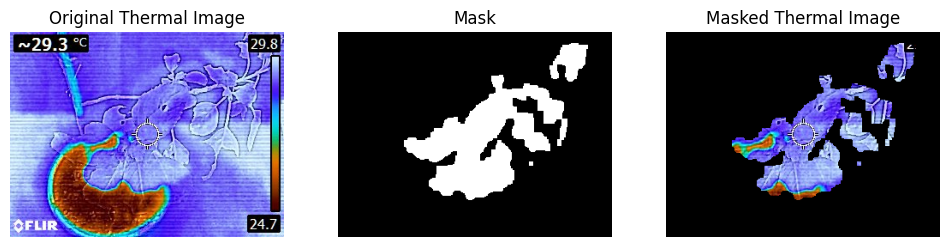

In [82]:
masked_image = print_masked_thermal_image(ir_image, mask)

In [84]:
wet_mask = create_wet_mask(masked_image)
dry_mask = create_dry_mask(masked_image)

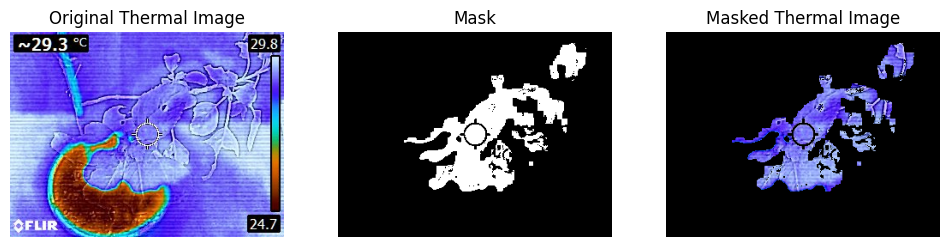

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [85]:
print_masked_thermal_image(ir_image, dry_mask)

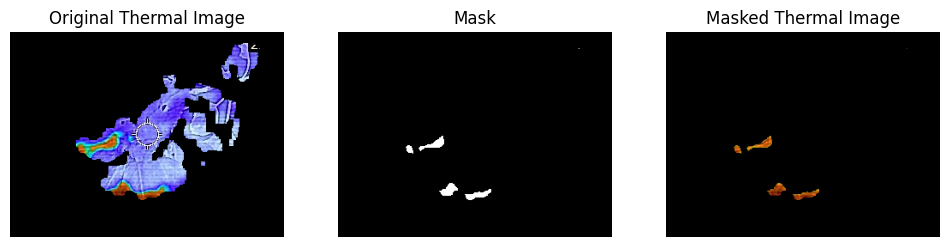

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [86]:
print_masked_thermal_image(masked_image, wet_mask)

## Calculating CWSI and temperatures

In [92]:
def calculate_cwsi_from_images(infrared_image, wet_mask, dry_mask, canopy_mask, min_temp=25, max_temp=32):

    if isinstance(infrared_image, Image.Image):
        infrared_array = np.array(infrared_image)
    else:
        infrared_array = infrared_image

    if len(infrared_array.shape) == 3:
        infrared_gray = np.mean(infrared_array, axis=2)
    else:
        infrared_gray = infrared_array

    scaled_temperatures = infrared_gray / 255.0 * (max_temp - min_temp) + min_temp

    T_w = np.nanmean(np.where(wet_mask > 0, scaled_temperatures, np.nan))
    T_d = np.nanmean(np.where(dry_mask > 0, scaled_temperatures, np.nan))
    T_c = np.nanmean(np.where(canopy_mask > 0, scaled_temperatures, np.nan))

    # Calculate CWSI
    cwsi = (T_c - T_w) / (T_d - T_w) if (T_d - T_w) != 0 else np.nan

    # Create a dictionary with the calculated values
    results = {
        "T_w": T_w,
        "T_d": T_d,
        "T_c": T_c,
        "CWSI": cwsi
    }

    return results


In [93]:
cwsi = calculate_cwsi_from_images(ir_image, wet_mask, dry_mask, mask)

{'T_w': 27.462778777640953,
 'T_d': 29.352748696095638,
 'T_c': 29.311150857405487,
 'CWSI': 0.9779902112282488}

## Using the above Functions to calculate CWSI for a large number of images and creating a Dataframe

In [ ]:
import pandas as pd
import cv2
import os

df = pd.DataFrame(columns=['T_w', 'T_d', 'T_c', 'CWSI'])

ir_path = './data/ir_images/'
normal_path = './data/normal_images/'
count =0
# Iterate over the IR images
for i in range(len(os.listdir(ir_path))):
    try:
        ir_image = cv2.imread(f'./data/ir_images/IR {i+6730}.jpg')
        normal_image = cv2.imread(f'./data/normal_images/Normal {i+6730}.jpg')
        # if len(ir_image.shape) == 3:
        #     ir_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        normalized_image = cv2.normalize(ir_image, None, 0, 255, cv2.NORM_MINMAX)
        
        # Convert the image to RGB (since OpenCV uses BGR by default)
        ir_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB)

        # Process the normal image to get the original, mask, and segment
        original, mask, segment = mask_canopy(f'./data/normal_images/Normal {i+6730}.jpg')

        # Generate the masked image for visualization
        masked_image = print_masked_thermal_image(ir_image, mask)

        # Create wet and dry masks
        wet_mask = create_wet_mask(masked_image)
        dry_mask = create_dry_mask(masked_image)

        # Calculate CWSI and temperatures
        results = calculate_cwsi_from_images(ir_image, wet_mask, dry_mask, mask)

        # Append the results as a new row to the DataFrame
        new_row = pd.DataFrame(results, index=[0])
        df = pd.concat([df, new_row], ignore_index=True)
    except:
        count=count+1
        continue


# Print or save the DataFrame as needed
print(df)


## Changing things in Dataframe to make it look good

In [136]:
# Drop rows where the CWSI value is greater than 1
# df = df[df["CWSI"] <= 1]

In [137]:
len(df)

232

In [138]:
df.reset_index(drop=True, inplace=True)
df.head()

T_w        T_d        T_c      CWSI
0  29.435559  26.695838  29.311151  0.045409
1  29.440331  26.743763  29.299837  0.052101
2  29.499908  26.768615  29.368727  0.048029
3  29.535156  27.305882  29.512332  0.010238
4  28.708179  26.708562  28.573247  0.067479

<Axes: ylabel='Frequency'>

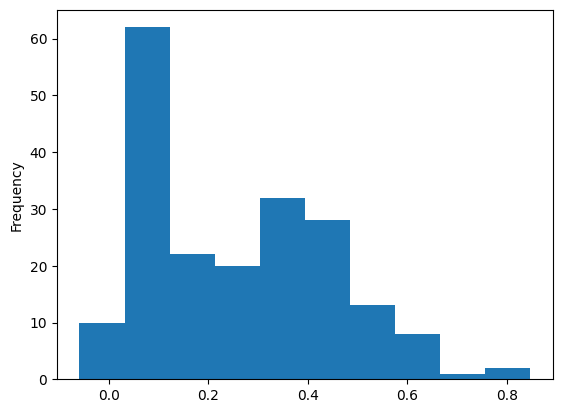

In [139]:
df["CWSI"].plot(kind="hist")

In [140]:
df["T_d_theoretical"] = df["T_c"] * 1.02
df["T_w_theoretical"] = df["T_c"] * 0.98
df.head()

T_w        T_d        T_c      CWSI  T_d_theoretical  T_w_theoretical
0  29.435559  26.695838  29.311151  0.045409        29.897374        28.724928
1  29.440331  26.743763  29.299837  0.052101        29.885833        28.713840
2  29.499908  26.768615  29.368727  0.048029        29.956101        28.781352
3  29.535156  27.305882  29.512332  0.010238        30.102579        28.922085
4  28.708179  26.708562  28.573247  0.067479        29.144712        28.001783

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T_w              232 non-null    float64
 1   T_d              198 non-null    float64
 2   T_c              232 non-null    float64
 3   CWSI             198 non-null    float64
 4   T_d_theoretical  232 non-null    float64
 5   T_w_theoretical  232 non-null    float64
dtypes: float64(6)
memory usage: 11.0 KB


In [142]:
df.isna().sum(
    
)

T_w                 0
T_d                34
T_c                 0
CWSI               34
T_d_theoretical     0
T_w_theoretical     0
dtype: int64

In [143]:
df.dropna(inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T_w              198 non-null    float64
 1   T_d              198 non-null    float64
 2   T_c              198 non-null    float64
 3   CWSI             198 non-null    float64
 4   T_d_theoretical  198 non-null    float64
 5   T_w_theoretical  198 non-null    float64
dtypes: float64(6)
memory usage: 10.8 KB
